In [59]:
import pandas
import numpy as np

In [60]:
li=[]
for i in range(10,19):
    print('{}{}'.format(i,i+1))
    boxscore=pandas.read_csv('./boxscore/gamehunx{}{}.csv'.format(i,i+1),header=None)
    li.append(boxscore)
boxscore = pandas.concat(li, axis=0, ignore_index=True)

1011
1112
1213
1314
1415
1516
1617
1718
1819


In [61]:
boxscore.columns=["CODE","team","GM","Min","PF","DF","2Pm","2Pa","2PP","3Pm","3Pa","3PP","FTm","Fta","FTP","ORB","DRB","TRB","BS","SR","TOV","ST","ASS","PTS", "VALU","OP","OER","ASTO","VIR","extra1","date","extra3","nat"]

In [62]:
boxscore=boxscore.drop(axis=1,labels=['VALU','OP','OER','ASTO','VIR','extra3','GM','CODE','nat'])

In [63]:
f = dict.fromkeys(boxscore.columns, 'sum')
f.update(
    dict.fromkeys(['2PP','3PP','FTP','date'], 'mean'))

In [64]:
result=boxscore.groupby(['extra1','date','team']).agg(f)

In [65]:
result=result.drop(axis=1,labels=['extra1','team','Min','date'])
result.columns

Index(['PF', 'DF', '2Pm', '2Pa', '2PP', '3Pm', '3Pa', '3PP', 'FTm', 'Fta',
       'FTP', 'ORB', 'DRB', 'TRB', 'BS', 'SR', 'TOV', 'ST', 'ASS', 'PTS'],
      dtype='object')

In [66]:
result=result.reset_index()

In [67]:
result=result.sort_values(["date",'extra1'])

In [68]:
data=pandas.DataFrame(columns=['gameid',"teamid","2PP","3PP","DRB%","ASS%","TOV%","Win%","3PTS/PTS","FTP"])
data

,gameid,teamid,2PP,3PP,DRB%,ASS%,TOV%,Win%,3PTS/PTS,FTP


In [69]:
data['gameid']=result['extra1']
data["teamid"]=result["team"]
data['date']=result['date']
data["2PP"]=result["2PP"]/10
data["3PP"]=result["3PP"]/10
data["FTP"]=result["FTP"]/10
data["3PTS/PTS"]=result["3Pm"]*3/result["PTS"]*100
data["FT/PTS"]=result["FTm"]/result["PTS"]*100
data["Poss"]=0.96*(result['2Pa']+result['3Pa']+0.44*result['Fta']+result['TOV']-result['ORB'])
data["ASS%"]=result['ASS']/(result['2Pa']+result['3Pa']+0.44*result['Fta']+result['TOV']+result['ASS'])*100
data["TOV%"]=result['TOV']/(result['2Pa']+result['3Pa']+0.44*result['Fta']+result['TOV']+result['ASS'])*100
data['OffRating']=100*result['PTS']/data['Poss']

In [70]:
from itertools import tee
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

In [71]:
lista1=[]
lista2=[]
lista3=[]
for (i1, row1), (i2, row2) in pairwise(result.sort_values(['date','extra1']).iterrows()):    
    if(row1['extra1']==row2['extra1']):
        if(row1['PTS']>row2['PTS']):
            lista1.append(100)
            lista1.append(0)
        else:
            lista1.append(0)
            lista1.append(100)
        lista2.append(row1['DRB']/(row2['Fta']-row2['FTm']+row2['2Pa']-row2['2Pm']+row2['3Pa']-row2['3Pm'])*100)
        lista2.append(row2['DRB']/(row1['Fta']-row1['FTm']+row1['2Pa']-row1['2Pm']+row1['3Pa']-row1['3Pm'])*100)
        lista3.append(row2['PTS']/(0.96*(row1['2Pa']+row1['3Pa']+0.44*row1['Fta']+row1['TOV']-row1['ORB']))*100)
        lista3.append(row1['PTS']/(0.96*(row2['2Pa']+row2['3Pa']+0.44*row2['Fta']+row2['TOV']-row2['ORB']))*100)

In [72]:
data['Win%']=lista1
data['DRB%']=lista2
data['DefRating']=lista3

In [73]:
data=data.sort_values(['teamid','date','gameid'])
data=data.reset_index()
data=data.drop(axis=1,columns=['index'])

In [74]:
#data=data.drop(axis=1,columns=['level_0'])
data

KeyError: "['level_0'] not found in axis"

In [87]:
cnt=0
actual_team=0
index=0
lista=[]
for i,r in data.iterrows():
    adatok=[]
    if(r["teamid"]==actual_team):
        cnt+=1
        if(cnt>20):
            last_five=data[i-5:i]
            season=data[i-20:i]
            adatok.append(r['gameid'])
            adatok.append(actual_team)
            for c in data.columns:
                if(c  in ['OffRating', 'ASS%','2PP', '3PP','TOV%','DRB%']):
                    adatok.append(last_five[c].mean())
                if(c  in ['DefRating','Win%','3PTS/PTS', 'FTP','FT/PTS','Poss']):
                    adatok.append(season[c].mean())
            adatok.append(r['date'])
            lista.append(adatok)
    else:
        actual_team=r["teamid"]
        cnt=0

In [84]:
data.columns

Index(['gameid', 'teamid', '2PP', '3PP', 'DRB%', 'ASS%', 'TOV%', 'Win%',
       '3PTS/PTS', 'FTP', 'date', 'FT/PTS', 'Poss', 'OffRating', 'DefRating'],
      dtype='object')

In [86]:
lista

[[1050.0,
  6015.0,
  49.78333333333333,
  23.97,
  65.23155929038282,
  22.207491979828273,
  9.613651606714708,
  85.0,
  29.408919082742965,
  14.148279964684301,
  69.03359999999999,
  140.23082757085567,
  102.72093841531535,
  20110305.0],
 [1055.0,
  6015.0,
  46.33833333333333,
  23.623333333333335,
  66.76902699064121,
  21.678645389165155,
  8.342085987426177,
  85.0,
  29.399134346930833,
  14.433668092538184,
  68.8512,
  139.0147935719348,
  103.84593556088161,
  20110319.0],
 [1061.0,
  6015.0,
  45.74606060606061,
  22.752121212121214,
  66.00432110828828,
  19.42311105784939,
  9.79890114521943,
  85.0,
  28.489444168947966,
  15.119231704931064,
  68.98176,
  132.68179119477006,
  104.06117653991998,
  20110323.0],
 [1069.0,
  6015.0,
  45.10439393939394,
  22.05712121212121,
  69.57157257027659,
  20.010023890358426,
  9.686177330399866,
  85.0,
  28.59196047836083,
  14.420256868025191,
  68.96256,
  132.54150443035368,
  103.1055887397559,
  20110326.0],
 [1077.0,
 

In [88]:
data2=pandas.DataFrame(data=lista,columns=['gameid',"teamid",'2PP', '3PP', 'DRB%', 'ASS%', 'TOV%', 'Win%','3PTS/PTS', 'FTP','FT/PTS', 'Poss', 'OffRating', 'DefRating','date'])

In [89]:
data2.sort_values(['date','gameid'])

,gameid,teamid,2PP,3PP,DRB%,ASS%,TOV%,Win%,3PTS/PTS,FTP,FT/PTS,Poss,OffRating,DefRating,date
338,1047.0,9002.0,42.516667,18.206667,66.378781,14.725956,12.599622,50.0,24.766131,30.898750,17.161545,70.66176,120.323989,113.613750,20110302.0
947,1047.0,9005.0,44.039000,20.767727,61.656723,18.493256,10.917450,60.0,35.601035,31.296705,15.507143,66.99264,124.891863,115.739138,20110302.0
1681,1048.0,9013.0,36.560000,14.337000,56.094685,14.831365,16.536782,35.0,25.022812,33.143750,17.911517,74.17728,106.274850,116.599287,20110304.0
2173,1048.0,9221.0,28.356455,14.286364,48.126614,12.388877,18.115027,5.0,22.525622,34.845669,21.504871,78.12480,104.865156,131.357054,20110304.0
135,1049.0,9001.0,36.633939,17.313333,65.102385,14.597214,8.285912,85.0,26.365620,31.938220,19.050741,72.89472,126.897457,101.290234,20110305.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1153.0,9013.0,37.065000,19.748333,59.196440,17.804916,11.039485,25.0,26.863482,28.024167,17.255037,72.14208,112.311678,113.221581,20190406.0
337,1154.0,9001.0,27.275000,17.326667,65.269508,14.043589,11.929498,40.0,33.353366,32.486667,17.401785,71.49888,105.196128,111.074241,20190406.0
2571,1154.0,40000.0,33.038333,23.578333,53.170159,17.279256,11.234466,55.0,32.006707,28.100371,17.464576,75.50208,125.658574,117.228059,20190406.0
134,1155.0,6015.0,36.987273,13.640909,65.923410,17.256636,11.538797,80.0,27.677092,35.008742,17.520551,74.35776,112.848182,103.002754,20190406.0


In [90]:
tabla=[]
for (i1, row1), (i2, row2) in pairwise(data2.sort_values(['date','gameid']).iterrows()):
    sor=[]
    if(row1['gameid']==row2['gameid']):
        for c in data2.columns:
            sor.append(row1[c])
        for c in data2.columns:
            if(c not in ['gameid','date']):
                sor.append(row2[c])
        tabla.append(sor)

In [91]:
len(tabla)

1259

In [92]:
test=pandas.DataFrame(data=tabla,columns=['gameid',"teamid_1","2PP_1","3PP_1","DRB%_1","ASS%_1","TOV%_1","Win%_1","3PTS/PTS_1","FTP_1","FT/PTS_1","Poss_1","OffRating_1",'DefRating_1','date',"teamid_2","2PP_2","3PP_2","DRB%_2","ASS%_2","TOV%_2","Win%_2","3PTS/PTS_2","FTP_2","FT/PTS_2","Poss_2","OffRating_2",'DefRating_2'])

In [93]:
test.to_csv('test2.csv',index=False)

In [163]:
#legközelebb elég csak beolvasni

In [2]:
results=pandas.read_csv('allgames.csv')

In [3]:
test=pandas.read_csv('test.csv')

In [120]:
merge=pandas.merge(results,test,on=['date',"gameid"],how='inner')

In [121]:
merge=merge.drop(axis=1,columns=['team1','team2'])

In [96]:
merge

,gameid,date,won,teamid_1,2PP_1,3PP_1,DRB%_1,ASS%_1,TOV%_1,Win%_1,...,DRB%_2,ASS%_2,TOV%_2,Win%_2,3PTS/PTS_2,FTP_2,FT/PTS_2,Poss_2,OffRating_2,DefRating_2
0,1047.0,20110302.0,9002.0,9002.0,42.516667,18.206667,66.378781,14.725956,12.599622,50.0,...,61.656723,18.493256,10.917450,60.0,35.601035,31.296705,15.507143,66.99264,124.891863,115.739138
1,1048.0,20110304.0,9013.0,9013.0,36.560000,14.337000,56.094685,14.831365,16.536782,35.0,...,48.126614,12.388877,18.115027,5.0,22.525622,34.845669,21.504871,78.12480,104.865156,131.357054
2,1051.0,20110305.0,9003.0,9003.0,45.510000,20.693333,56.560272,17.712022,8.824659,70.0,...,51.353273,12.920214,15.907143,30.0,24.874056,31.981402,19.847632,71.71200,111.821917,122.397514
3,1052.0,20110305.0,9007.0,9007.0,46.290727,14.841273,57.820864,15.660473,12.843264,70.0,...,55.744489,12.399561,10.880006,40.0,28.253960,34.540174,20.672266,72.75840,113.183021,120.991790
4,1028.0,20110310.0,9213.0,9213.0,37.778333,16.778333,56.956604,11.786080,8.967581,50.0,...,71.524362,13.540086,11.879001,60.0,31.147464,32.544470,18.192758,68.16192,118.631982,107.065422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,1151.0,20190406.0,9003.0,9003.0,39.928333,24.350000,55.253400,16.170592,9.003446,80.0,...,60.201930,16.038988,10.824605,50.0,34.366031,30.648485,15.219194,73.49376,112.978479,109.768089
1119,1152.0,20190406.0,9800.0,9004.0,38.610152,15.927576,61.304213,15.918888,12.366808,50.0,...,58.864058,15.871272,11.446297,50.0,28.465188,30.349167,16.987172,69.60384,110.301848,114.180400
1120,1153.0,20190406.0,9006.0,9006.0,32.967242,21.438242,57.097886,16.555643,10.153468,40.0,...,59.196440,17.804916,11.039485,25.0,26.863482,28.024167,17.255037,72.14208,112.311678,113.221581
1121,1154.0,20190406.0,9001.0,9001.0,27.275000,17.326667,65.269508,14.043589,11.929498,40.0,...,53.170159,17.279256,11.234466,55.0,32.006707,28.100371,17.464576,75.50208,125.658574,117.228059


In [97]:
labels=np.array(merge['won'])

In [122]:
merge=merge.drop(axis=1,columns=['date','won'])

In [99]:
merge = np.array(merge)

In [24]:
from sklearn.model_selection import train_test_split

In [102]:
train_data, test_data, train_labels, test_labels = train_test_split(merge, labels, test_size = 0.1, random_state = 42)

In [103]:
print('Training Features Shape:', train_data.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_data.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1010, 27)
Training Labels Shape: (1010,)
Testing Features Shape: (113, 27)
Testing Labels Shape: (113,)


In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [104]:
rf.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [105]:
predictions = rf.predict(test_data)

In [106]:
test_labels

array([ 9006.,  9004.,  6015.,  9003., 40000.,  6015.,  9007.,  9001.,
        9002.,  9007.,  9007.,  9006.,  9003.,  9007.,  9005.,  9006.,
        9001.,  9006.,  9004.,  9013.,  9001.,  9011.,  9213.,  9003.,
        9004.,  9213.,  9006.,  9013.,  9001.,  9013.,  9013.,  9007.,
        9002., 40000.,  9001.,  9006.,  9002.,  9002.,  9001.,  9006.,
        9003.,  9007.,  9013.,  9004.,  9013.,  9230.,  9013.,  9011.,
        6015.,  9004.,  9003.,  9006.,  9003.,  9800.,  9013.,  9006.,
        9004.,  9013.,  9007.,  9001.,  9800.,  9004.,  9004.,  9213.,
        9230.,  6015.,  9003.,  9001.,  9001.,  6015.,  9003.,  9006.,
        9800.,  9001.,  9230.,  9007.,  9004.,  9002.,  9005.,  9002.,
        9007.,  9218.,  9001.,  9003.,  9002.,  9003.,  6015.,  9002.,
        9013.,  9213.,  9006.,  9213.,  9213.,  9005.,  9213.,  9006.,
        9013.,  9004.,  9002.,  9001.,  9003.,  9213.,  9007.,  9006.,
        9003.,  9006.,  9001.,  9001.,  9005.,  9003.,  9800.,  9002.,
      

In [107]:
predictions

array([ 9230.,  9002.,  6015.,  9003.,  9013.,  6015.,  9007.,  9001.,
        9002.,  9002.,  9213.,  9007.,  9003.,  9007.,  9005.,  9003.,
        9001.,  9006.,  9004.,  9006.,  9001.,  9002.,  9213.,  9003.,
        9004.,  9800.,  9006.,  9230.,  9001.,  9004.,  9002.,  9001.,
        9002., 40000.,  9001.,  9013.,  9002.,  9002.,  9001.,  9006.,
        9002.,  9002.,  9004.,  9004.,  9003.,  9013.,  9213.,  9001.,
        6015.,  9001.,  9002.,  9006.,  9003.,  9800.,  9800., 40051.,
        9004.,  9004.,  9003.,  9001.,  9004.,  9004.,  9004.,  9213.,
        9002.,  6015.,  9003.,  9001.,  9001.,  6015.,  9003., 40051.,
        9800.,  9001.,  9002.,  9007.,  9003.,  9002.,  9800.,  9002.,
        9007.,  9013.,  9800.,  9003.,  9002.,  9003.,  6015.,  9002.,
        9004.,  9007.,  9800.,  9003.,  9213.,  9005.,  9013.,  9013.,
        9005.,  9004.,  9002.,  9001.,  9002.,  9213.,  9007.,  9004.,
        9003.,  9002.,  9001.,  9001.,  9004.,  9002.,  9800.,  9002.,
      

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
cm=confusion_matrix(test_labels,predictions)

In [108]:
rf.score(test_data,test_labels)

0.5752212389380531

In [48]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

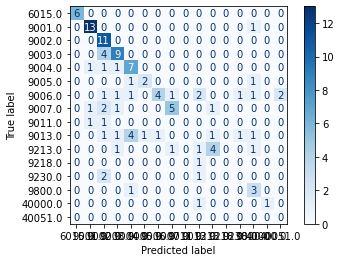

In [109]:
disp = plot_confusion_matrix(rf, test_data,test_labels,
                                 cmap=plt.cm.Blues)

In [110]:
from sklearn.tree import plot_tree

In [113]:
estimator = rf.estimators_[5]

In [149]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot',
                feature_names = merge.columns,
                class_names = classes,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [147]:
for g in boxscore['team'].unique():
    print("'",g,"'",end =",")

' 9005 ',' 40051 ',' 9007 ',' 9013 ',' 9003 ',' 9221 ',' 9011 ',' 9001 ',' 9002 ',' 9004 ',' 9800 ',' 9006 ',' 9213 ',' 6015 ',' 9230 ',' 9218 ',' 9233 ',' 40000 ',' 9217 ',

In [148]:
classes=[' 9005 ',' 40051 ',' 9007 ',' 9013 ',' 9003 ',' 9221 ',' 9011 ',' 9001 ',' 9002 ',' 9004 ',' 9800 ',' 9006 ',' 9213 ',' 6015 ',' 9230 ',' 9218 ',' 9233 ',' 40000 ',' 9217 ']